In [10]:
%%writefile dataset.csv
label;url
кот;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_1?raw=true
кот;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_2?raw=true
кот;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_3?raw=true
кот;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_4?raw=true
собака;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_5?raw=true
собака;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_6?raw=true
ковка;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_7?raw=true
металорезка;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_8?raw=true
шлифовка;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_9?raw=true
корпус авто;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_10?raw=true
конвеер;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_11?raw=true
корпус авто;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_12?raw=true
дом.растение;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_13?raw=true
поле;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_14?raw=true
поле;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_15?raw=true
комбайн;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_16?raw=true
авто;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_17?raw=true
комбайн;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_18?raw=true
комбайн;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_19?raw=true
комбайн;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_20?raw=true
комбайн;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_21?raw=true
козел;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_22?raw=true
корова;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_23?raw=true
корова;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_24?raw=true
сувенир;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_25?raw=true
овца;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_26?raw=true
овца;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_27?raw=true
курица;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_28?raw=true
курица;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_29?raw=true
авто;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_30?raw=true
Гагарин;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_31?raw=true
аксолотль;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_32?raw=true
печь;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_33?raw=true
подшипник;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_34?raw=true
кор.передач;https://github.com/ant-nik/neural_network_course/blob/main/practice_1_imgs/simple.csv_image_35?raw=true

Overwriting dataset.csv


В текущем окружении не обнаружен графический ускоритель (GPU)
Число графических ускорителей в системе (GPU) = 0
Введите файл с описанием датасета: dataset.csv
Загрузить модель из файла? ("да" - загрузить): нет
Используем предобученную модель из библиотеки...
Выберите модель из списка ниже: 
	1) ResNet
	2) AlexNet
	3) DenseNet
	4) MobileNetV3
	5) SwinTransformer
Введите номер модели (1-5): 5
Выбрана модель №5
----------------------------------------------------------------------
Модель: SwinTransformer
Число параметров: 28288354


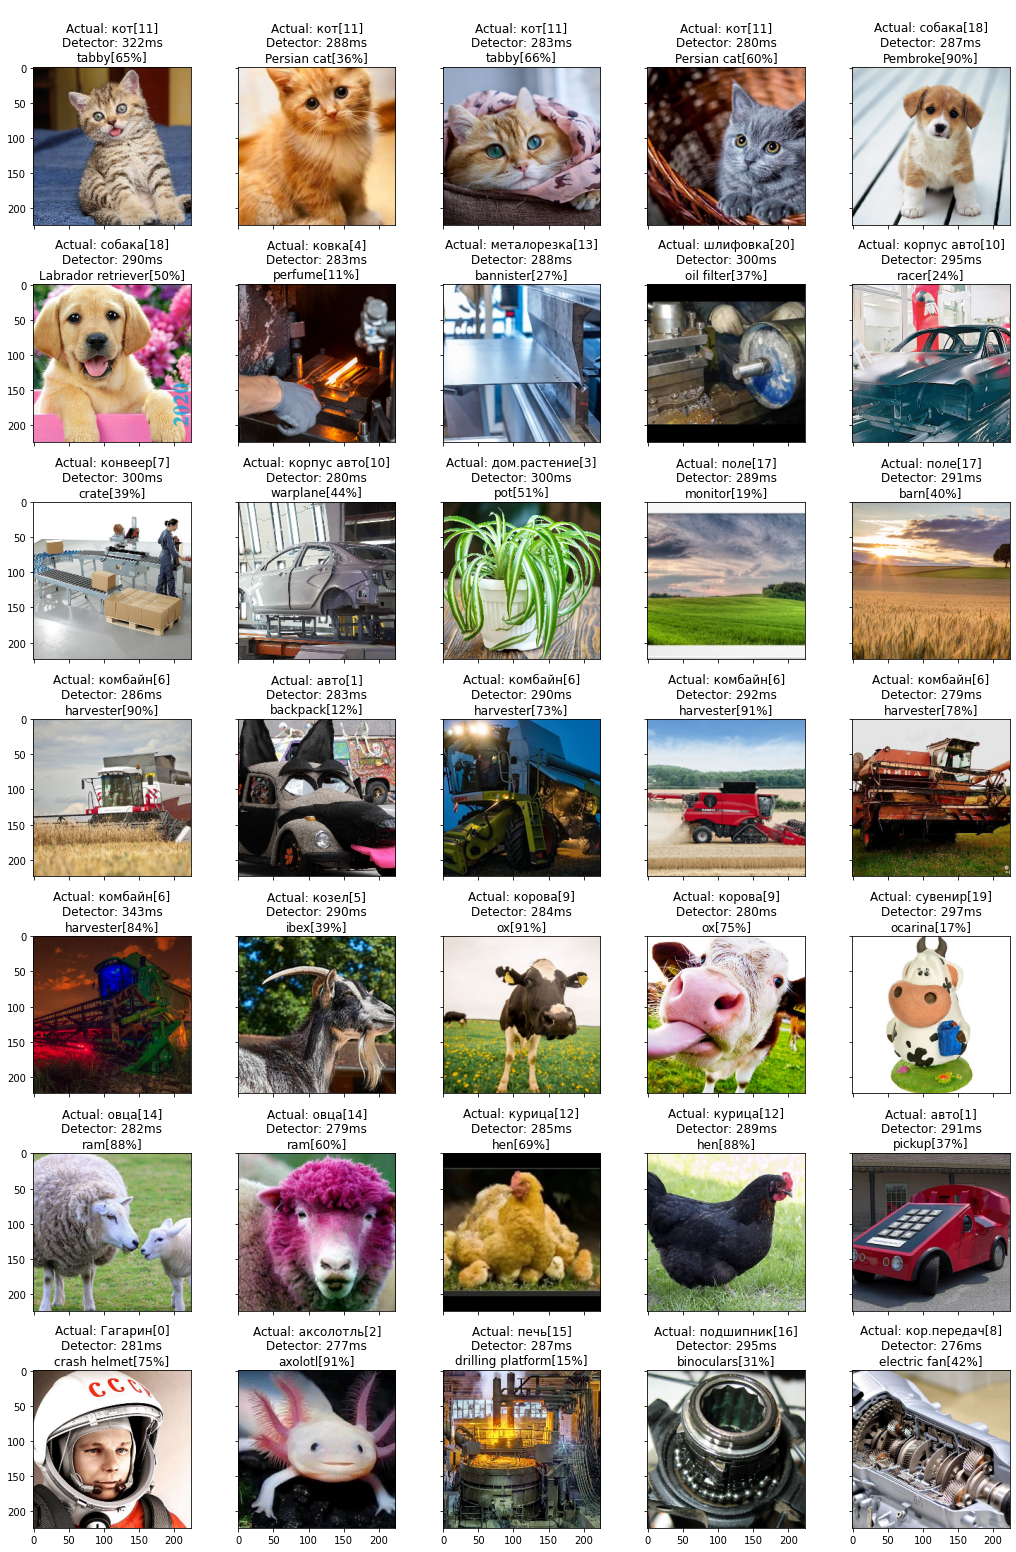

In [12]:
import os
import time
import copy
import math

import dill as pickle
import typing
from typing import Callable
from functools import partial

import numpy
import pandas
from pandas.core.arrays import boolean
import matplotlib.pyplot as plt

from requests import get

import torch
from torch import Tensor, nn
from torch.utils.data import DataLoader, Dataset

from torchvision.transforms import ToPILImage, Compose, Resize, CenterCrop
from torchvision.io import read_image
from torchvision import models


strip_chars = ' \t'
tmp_file_name = 'tmp_file_name_for_image_download'

to_image = ToPILImage()


def classify(dataset: Dataset, 
			 preprocess: typing.Callable[[Tensor],Tensor],
			 num_per_row: int, 
			 single_size: float,
			 labels: typing.List[str],
             model_labels: typing.List[str] = None,
             model: typing.Callable[[Tensor], Tensor] = None,
             debug: typing.Any = False,
             num_of_classes: int = 1,
             vspace: float = 0.3
             ) -> None:
    num = len(dataset)
    fig, axs = plt.subplots(
					math.ceil(num/num_per_row), 
					num_per_row, 
					figsize=(
							single_size*num_per_row, 
							(single_size + vspace)*(math.ceil(num/num_per_row))
							),
						sharex=True, 
						sharey=True
						)
	
    for i in range(0, len(dataset)):
        try:
            image, label = dataset[i]
            pred = None
            
            if model is not None and model_labels is not None:
                start_time = time.perf_counter_ns()
                score = model(image.unsqueeze(0)).detach().squeeze(0).softmax(0)
                pred_index = numpy.flip(
                                score.detach()
								.cpu()
								.argsort()
								.numpy()
							)[0]
                end_time = time.perf_counter_ns()
                pred = f'Detector: {(end_time - start_time) / 1_000_000:.0f}ms\n{model_labels[pred_index]}[{score[pred_index].item()*100:.0f}%]'
            
            loc_fig = axs[i//num_per_row, i % num_per_row]
            loc_fig.imshow(to_image(preprocess(image)))
            title =f'\nActual: {labels[label]}[{label}]\n{pred}'
            loc_fig.title.set_text(title)
        except Exception as ex:
            if debug:
                raise ex
            print(f'Image {i} is failed to load: {str(ex)}')

    fig.subplots_adjust(wspace=0.3)
    plt.show()


def denormalize(dataset: Dataset, 
				trans: typing.Any) -> Callable[[Tensor], Tensor]:
    image, label = dataset[0]
    std = torch.as_tensor(
				trans.std, 
				dtype=image.dtype, 
				device=image.device
			).view(-1, 1, 1)
    mean = torch.as_tensor(
				trans.mean, 
				dtype=image.dtype, 
				device=image.device
				).view(-1, 1, 1)
    return lambda img: img*std + mean


class UrlDataset(Dataset):

    def __init__(self, file: str, to_device, transform = None) -> None:
        self.file = file
        self.transform = transform
        self.dataset = pandas.read_csv(file, sep=';')
        self.classes = self.dataset['label'].unique()
        self.classes.sort()
        self.class_to_index = {self.classes[i] : i for i in range(len(self.classes))}
        self.device = to_device


    def __len__(self) -> int:
        return len(self.dataset)


    def __getitem__(self, index: int) -> typing.Tuple[torch.Tensor, str]:
        url = self.dataset.iloc[index]['url'].strip(strip_chars)
        with open(tmp_file_name, 'wb') as file:
            file.write(get(url).content)
        image = read_image(tmp_file_name).to(self.device)
        label = self.class_to_index[self.dataset.iloc[index]['label']]
        if self.transform:
            return self.transform(image), label
        return image, label
    
  
alexNet = {
    # https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html
    'model': models.alexnet(weights=models.AlexNet_Weights.DEFAULT),
    'weights': models.AlexNet_Weights.DEFAULT,
    'preprocess': models.AlexNet_Weights.DEFAULT.transforms(),
    'output_layer': 'classifier',
    'in_features': lambda model: model.classifier[1].in_features
}

resNet50 = {
    # https://arxiv.org/abs/1512.03385
    'model': models.resnet50(weights=models.ResNet50_Weights.DEFAULT),
    'weights': models.ResNet50_Weights.DEFAULT,
    'preprocess': models.ResNet50_Weights.DEFAULT.transforms(),
    'output_layer': 'fc',
    'in_features': lambda model: model.fc.in_features
}

denseNet = {
    # https://arxiv.org/abs/1608.06993
    'model': models.densenet201(weights=models.DenseNet201_Weights.DEFAULT),
    'weights': models.DenseNet201_Weights.DEFAULT,
    'preprocess': models.DenseNet201_Weights.DEFAULT.transforms(),
    'output_layer': 'classifier',
    'in_features': lambda model: model.classifier[0].in_features
}

mobileNetV3_small = {
    # https://arxiv.org/abs/1905.02244
    'model': models.mobilenet_v3_small(weights=models.mobilenetv3.MobileNet_V3_Small_Weights.DEFAULT),
    'weights': models.mobilenetv3.MobileNet_V3_Small_Weights.DEFAULT,
    'preprocess': models.mobilenetv3.MobileNet_V3_Small_Weights.DEFAULT.transforms(),
    'output_layer': 'classifier',
    'in_features': lambda model: model.classifier[0].in_features
}

swinT = {
    # https://arxiv.org/abs/2103.14030
    'model': models.swin_t(weights=models.Swin_T_Weights.IMAGENET1K_V1.DEFAULT),
    'weights': models.Swin_T_Weights.IMAGENET1K_V1.DEFAULT,
    'preprocess': models.Swin_T_Weights.IMAGENET1K_V1.DEFAULT.transforms(),
    'output_layer': 'head',
    'in_features': lambda model: model.head.in_features
}


if __name__ == '__main__':
    gpu = 'обнаружен' if torch.cuda.is_available() else 'не обнаружен'
    print(f'В текущем окружении {gpu} графический ускоритель (GPU)')
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # !lscpu
    print(f'Число графических ускорителей в системе (GPU) = {torch.cuda.device_count() if torch.cuda.is_available() else "0"}')

    models = []
    for model in [resNet50, alexNet, denseNet, mobileNetV3_small, swinT]:
        model['model'].to(device)
        model['preprocess'].to(device)
        model['model'].eval()
        models.append(model)

    simple_filename = input("Введите файл с описанием датасета: ")

    model = None
    class_labels = None
    if input('Загрузить модель из файла? ("да" - загрузить): ') != 'да':
        print('Используем предобученную модель из библиотеки...')
        modi = -1
        while modi < 0 or modi >= len(models):
            print("""Выберите модель из списка ниже: """)
            for i, model in enumerate(models):
                print(f"\t{i+1}) {models[i]['model'].__class__.__name__}")
            modi = int(input(f"Введите номер модели (1-{len(models)}): ")) - 1
            if modi < 0 or modi >= len(models):
                print(f"Ошибка, номер {modi} не существует, попробуйте ещё раз")

        print(f"Выбрана модель №{modi + 1}")
        model = models[modi]
        class_labels = model['weights'].meta["categories"]
    else:
        filename = input('Введите имя файла с моделью: ')
        with open(filename, 'rb') as file:
            model = pickle.load(file)

    transform = model['preprocess']
    simple = UrlDataset(
                simple_filename, 
                device, 
                transform
                )
    
    if class_labels is None:
        class_labels = simple.classes

    print('-'*70)
    print(f'Модель: { model["model"].__class__.__name__}')
    print(f'Число параметров: {sum(item.numel() for item in model["model"].parameters())}')


    num_per_row = 5
    single_size = 3.5
    vspace = 0.4

    classify(
        simple, 
        denormalize(simple, transform), 
        num_per_row=num_per_row, 
        single_size=single_size, 
        vspace = vspace,
        labels = simple.classes, 
        model=model['model'], 
        model_labels=class_labels,
        debug=True
	 )